# 👩‍💻 평균과 신뢰구간 그림

In [1]:
setwd("C:/Users/eunee/khu_sda_2019/data")
load("demog_5var.RData")
attach(ndemog)

## ✔️ 패키지 설치

In [2]:
install.packages("gplots")

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eunee\AppData\Local\Temp\Rtmp8i6JgI\downloaded_packages


In [3]:
library(gplots)


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



## ✔️ 평균과 신뢰구간 그림

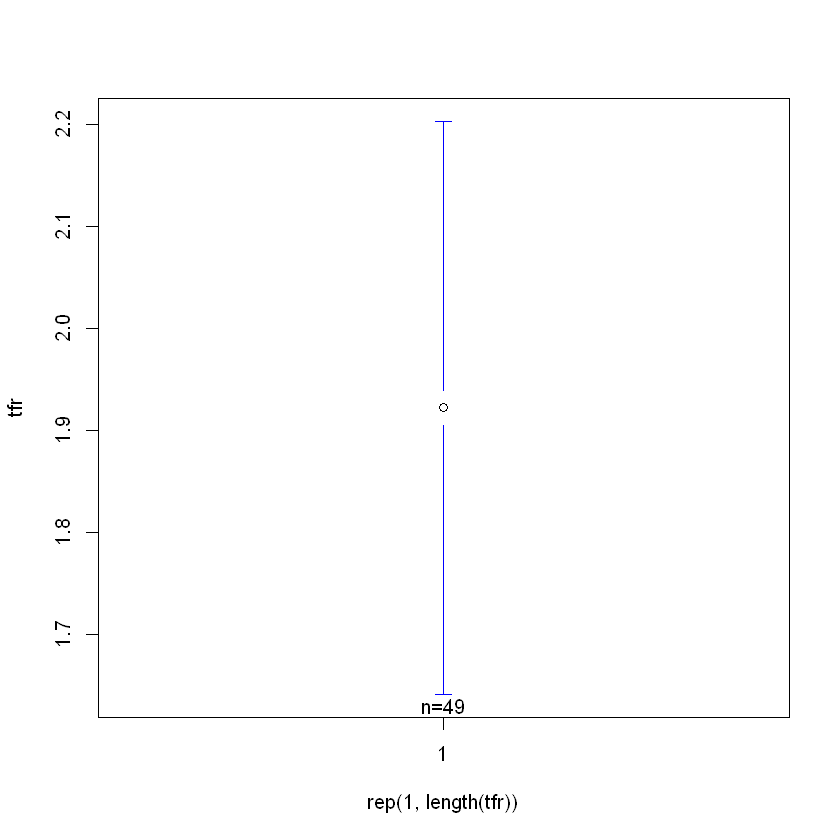

In [4]:
plotmeans(tfr ~ rep(1, length(tfr)))

```plotmeans```는 ```종속변수 ~ 설명변수```로 사용하는데, 여기에서는 <u>다른 설명 변수가 존재하지 않는다</u>.   
이 경우 ```rep(1,length(tfr))```로 ```tfr```의 사례 수만큼 ```1```의 값을 가지는 객체를 만든다.   
   
   
모집단에 대한 평균과 95% 신뢰구간을 나타낸다. (아래의 ```t.test``` 결과를 그래프로 보여준 것)

In [5]:
t.test(tfr)


	One Sample t-test

data:  tfr
t = 13.74, df = 48, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.640650 2.203105
sample estimates:
mean of x 
 1.921878 


이때 p-value가 통상의 유의수준보다 작기 때문에 영가설을 기각한다. (즉, <u>모집단의 평균은 0이 아니다</u>)

#### 옵션을 넣은 신뢰구간 그림

ERROR: Error in plotmeans(tfr ~ rep(1, length(tfr)), xlab = "TFRs", ylab = "Mean and 95% CI", : 객체 'FFALSE'를 찾을 수 없습니다


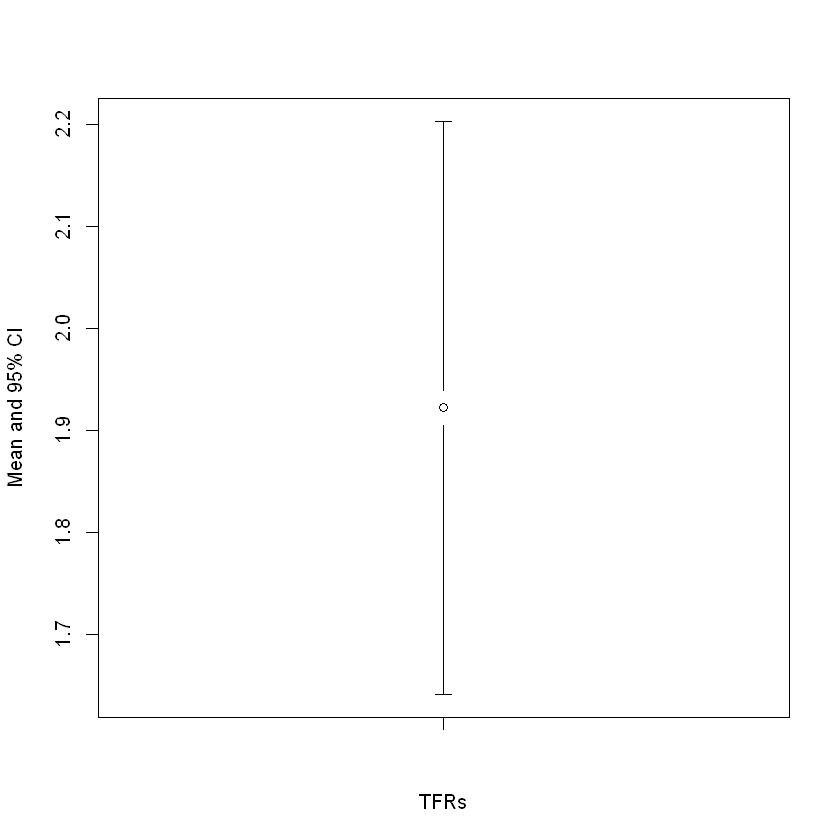

In [6]:
plotmeans(tfr ~ rep(1, length(tfr)),
         xlab = "TFRs", ylab = "Mean and 95% CI",
         barcol = 1, n.label = FFALSE, legends = "")

- ```barcol``` : 신뢰구간의 막대 색 (여기서는 검정색으로 바꾼다.)
- ```n.label  = FALSE``` : x축 위 사례수를 지운다.
- ```legends = ""``` : x축 아래 1이라고 적힌 부분을 지운다.
    
```plot```에서 ```legend```는 범례, ```plotmeans```에서 ```legends```는 x축 값을 의미한다.

#### 두 변수 사이의 관계를 살펴볼 때, 집단 간 평균 및 신뢰구간의 차이
조사망률에 따른 합계출산율의 평균과 신뢰구간을 구하고 싶다. 두 변수는 모두 <u>연속형</u>이기 때문에 설명 변수를 <u>범주화</u>해서 사용한다.

In [7]:
cdr_c <- cut(cdr, breaks = c(-Inf, 6, 7, Inf),
            labels = c("LT6", "6-LT7", "EToMT7"))

```breaks``` 명령어에서 ```right = FALSE``` 옵션을 주면 **a ≤ x < b**로 변한다.

Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"

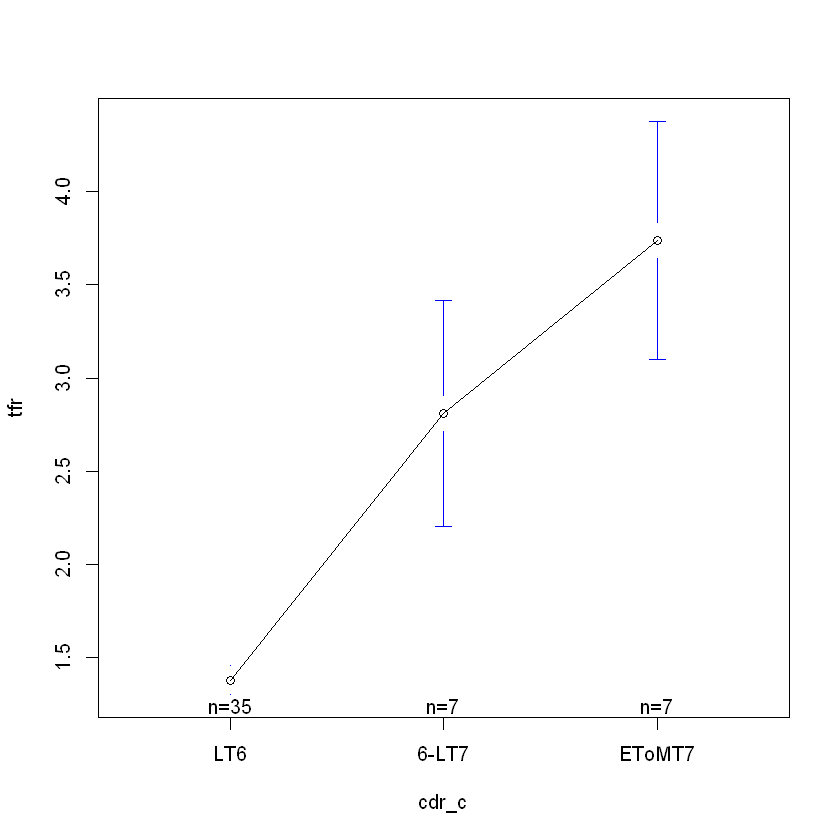

In [8]:
plotmeans(tfr ~ cdr_c)

```LT6```의 신뢰구간 길이가 너무 짧아 그릴 수 없다는 경고가 뜬다. 이 경우에도 ```t.test```를 이용하면 신뢰구간 그릴 수 있다.

In [9]:
tapply(tfr, cdr_c, t.test)

$LT6

	One Sample t-test

data:  X[[i]]
t = 36.033, df = 34, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.303301 1.459099
sample estimates:
mean of x 
   1.3812 


$`6-LT7`

	One Sample t-test

data:  X[[i]]
t = 11.333, df = 6, p-value = 2.826e-05
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2.203303 3.416697
sample estimates:
mean of x 
     2.81 


$EToMT7

	One Sample t-test

data:  X[[i]]
t = 14.311, df = 6, p-value = 7.283e-06
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.098180 4.376106
sample estimates:
mean of x 
 3.737143 



Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"

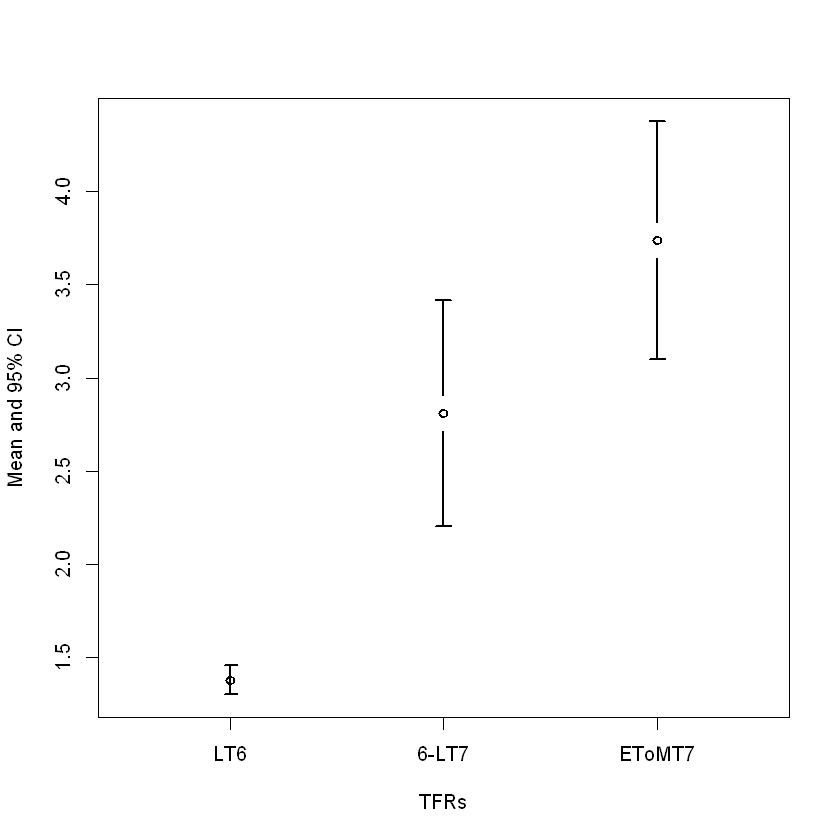

In [10]:
plotmeans(tfr ~ cdr_c,
         xlab = "TFRs", ylab = "Mean and 95% CI",
         barcol = 1, barwidth = 2, n.label = FALSE, connect = FALSE)

lines(c(0.97, 1.03), c(1.303, 1.303), lwd = 2)
lines(c(0.97, 1.03), c(1.459, 1.459), lwd = 2)
lines(c(1,1), c(1.303, 1.459), lwd = 2)

- ```barwidth``` : 신뢰구간 선 굵기
- ```lines``` 명령어들 : 신뢰구간 새로 그리기

조사망률이 높아지면 합계출산율이 높아진다.   
1. ```LT6```과 ```6-LT7```의 신뢰구간이 겹치지 않고
2. 겹치더라도 ```6-LT7```의 신뢰구간이 ```EToMT7```의 평균을 포함하지 않는다.
따라서, 각각 두 집단간 평균 차이가 통계적으로 유의미하다.

In [11]:
t.test(tfr ~ cdr_c, subset = cdr_c!="LT6")


	Welch Two Sample t-test

data:  tfr by cdr_c
t = -2.5747, df = 11.968, p-value = 0.02438
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.7119464 -0.1423393
sample estimates:
 mean in group 6-LT7 mean in group EToMT7 
            2.810000             3.737143 


```t.test``` 결과 p-value가 통상의 유의수준보다 작다. 만약 세 집단간 평균비교를 한꺼번에 하고 싶다면

In [12]:
summary(aov(tfr ~ cdr_c))

            Df Sum Sq Mean Sq F value Pr(>F)    
cdr_c        2  38.82  19.410   124.1 <2e-16 ***
Residuals   46   7.19   0.156                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

p-value가 작기 때문에 모든 집단의 평균이 같다는 영가설을 기각한다.